In [36]:
import numpy as np
import pandas as pd
from transformers import AutoTokenizer
from typing import Dict, List

import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv('./data/data_00.csv')
df.columns = ['question', 'answer']
df.fillna("", inplace=True)

In [16]:
model_path = "./Meta-Llama-3-8B"
tokenizer = AutoTokenizer.from_pretrained(model_path)
PAD_TOKEN = "<|pad|>"
tokenizer.add_special_tokens({"pad_token": PAD_TOKEN})
tokenizer.padding_side = "right"

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [21]:
def format_example(row:dict):
    messages = [
            {"role": "system", "content": "You are an assistant to help user solve mental health problem."},
            {"role": "user", "content": row['question']},
            {"role": "assistant", "content": row['answer']}
    ]

    return tokenizer.apply_chat_template(messages, tokenize=False)

df["text"] = df.apply(format_example, axis=1)

In [18]:
df["text"][0]

'<|im_start|>system\nYou are an assistant to help user solve mental health problem.<|im_end|>\n<|im_start|>user\nHi<|im_end|>\n<|im_start|>assistant\nHello there. Tell me how are you feeling today?<|im_end|>\n'

In [22]:
def count_tokens(row: Dict) -> int:
    return len(
        tokenizer(
            row["text"],
            add_special_tokens=True,
            return_attention_mask=False,
        )["input_ids"]
    )

df["token_count"] = df.apply(count_tokens, axis=1)

In [23]:
df.to_json("./train.json", orient="records", lines=True)

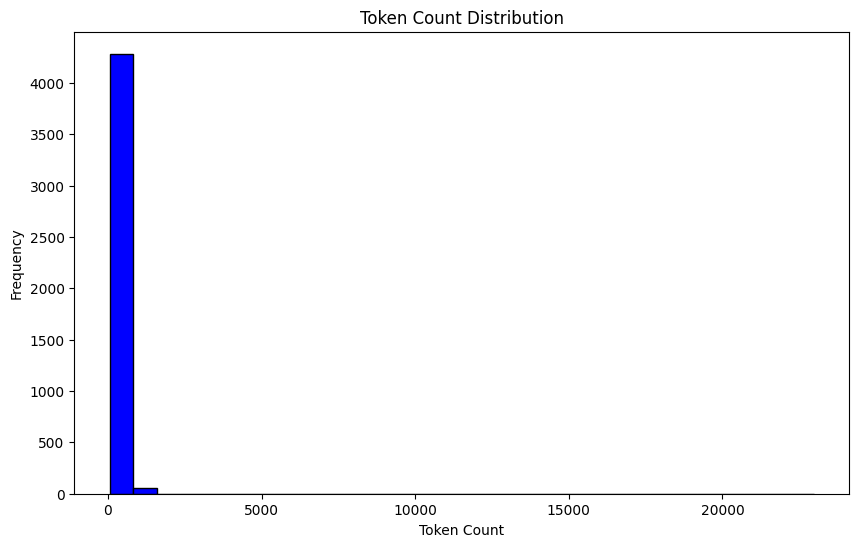

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(df["token_count"], bins=30, color='blue', edgecolor='black')

plt.title('Token Count Distribution')
plt.xlabel('Token Count')
plt.ylabel('Frequency')

plt.show()

In [49]:
len(df[df.token_count < 512]), len(df), len(df[df.token_count < 512]) / len(df)

(3884, 3884, 1.0)

In [46]:
df = df[df.token_count < 512]

In [50]:
df.to_json("train.json", orient="records", lines=True)